### Clone

In [1]:
# !git clone https://github.com/bighuang624/DSANet.git

### Convert time series 

In [27]:
import pandas as pd
df = pd.read_csv('./grafana_data_export.csv', 
                         sep=";", index_col=0, parse_dates=True, decimal='.').astype(float)
df.head()

,E-Parking P1,Kiekko (free with time limit) P1,Kiekko (free with time limit) P9,Vapaa (free parking) P4,Vapaa (free parking) P5,Vapaa (free parking) P7,Vapaa (free parking) P8,Lupa (parking permit) P1,Lupa (parking permit) P9
Time,,,,,,,,,
2020-01-30 00:00:00,8.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0
2020-01-30 00:01:00,8.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0
2020-01-30 00:02:00,8.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0
2020-01-30 00:03:00,8.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0
2020-01-30 00:04:00,8.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0


In [48]:
df.tail()

,E-Parking P1,Kiekko (free with time limit) P1,Kiekko (free with time limit) P9,Vapaa (free parking) P4,Vapaa (free parking) P5,Vapaa (free parking) P7,Vapaa (free parking) P8,Lupa (parking permit) P1,Lupa (parking permit) P9
Time,,,,,,,,,
2020-02-08 22:45:00,8.0,1.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0
2020-02-08 23:00:00,6.0,1.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0
2020-02-08 23:15:00,6.0,1.0,0.0,1.0,3.0,0.0,2.5,0.0,0.0
2020-02-08 23:30:00,7.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0
2020-02-08 23:45:00,7.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0


In [59]:
df.columns[5]

'Vapaa  (free parking) P7'

In [58]:
df[df.columns[5]].max()

0.0

In [29]:
len(df.columns)

9

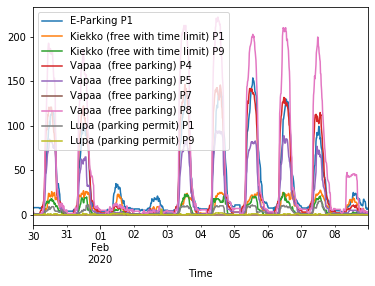

In [30]:
df = df.resample('15T').ffill()
df.plot()

In [62]:
df.reset_index().drop(['Time'], axis=1).to_csv(r'./data/parking_data.txt',
                                                  header=None, index=None, sep=',', mode='w')

In [22]:
!pip3 install -r 'requirements.txt' -q #--user

You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
# !git clone https://github.com/fbadine/util.git ''

Cloning into 'util'...
remote: Enumerating objects: 46, done.
remote: Total 46 (delta 0), reused 0 (delta 0), pack-reused 46
Unpacking objects: 100% (46/46), done.


In [8]:
from model_core import preprocess_data
data = preprocess_data("data/parking_data.txt", 96, 4, train=True)

573
144
144


In [13]:
import time, schedule

ModuleNotFoundError: No module named 'schedule'

In [12]:
data.test[0].shape

(144, 96, 9)

In [67]:
!python3 main.py --data="data/parking_data.txt" \
                 --horizon=4 \
                 --save="save/parking"\
                 --epochs=50 \
                 --GRUUnits=100 \
                 --lr=0.001\
                 --batchsize=128\
                 --highway=96 \
                 --dropout=0.2\
                 --test \
                 --predict="testingdata" \
                 --savehistory \
                 --plot \
                 --series-to-plot='2' \
                 --save-plot="save/parking"\
                 --logfilename="log/parking"\
                 --debuglevel=20\
                 --mc-iterations=100\
                 --patience=50
#                  --trainpercent=0.70 \
#                  --validpercent=0.15

2020-02-10 15:51:54.619461: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-02-10 15:51:54.625165: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394370000 Hz
2020-02-10 15:51:54.626069: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x559daabcf420 executing computations on platform Host. Devices:
2020-02-10 15:51:54.626083: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
    def call(self, inputs):
        # Get input tensors
	# - First one is the output of the SkipRNN layer which we will operate on
	# - The second is the oiriginal model input tensor which we will use to get
	#   the original batchsize
        x, original_model_input = inputs

        # Get the batchsize which is tf.shape(original_model_input)[0]
        batchsize = tf.shape(original_model_input)[0]

        # Get t

192/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
# import subprocess
# import os

# cmd = [os.path.realpath('./main.py'), '--data', 'data/parking_data.txt']

# print('shell False')
# subprocess.call(cmd)

In [4]:
import shutil
shutil.make_archive('../DSANet', 'zip', 'DSANet')

'/home/DSANet.zip'

In [10]:
import os
os.chdir('./LSTNet')